In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Define the neural network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = IrisNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.2f}')

Epoch [10/100], Loss: 0.8563
Epoch [20/100], Loss: 0.6067
Epoch [30/100], Loss: 0.4383
Epoch [40/100], Loss: 0.3383
Epoch [50/100], Loss: 0.2693
Epoch [60/100], Loss: 0.2119
Epoch [70/100], Loss: 0.1662
Epoch [80/100], Loss: 0.1329
Epoch [90/100], Loss: 0.1090
Epoch [100/100], Loss: 0.0931
Test Accuracy: 0.97


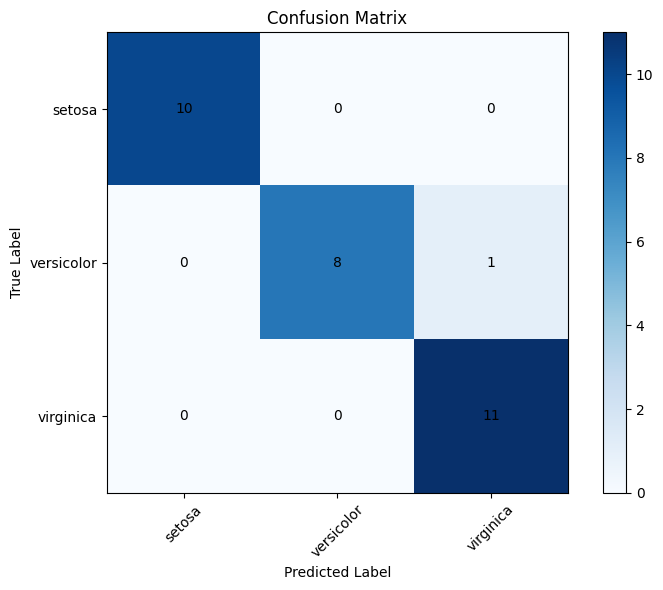

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



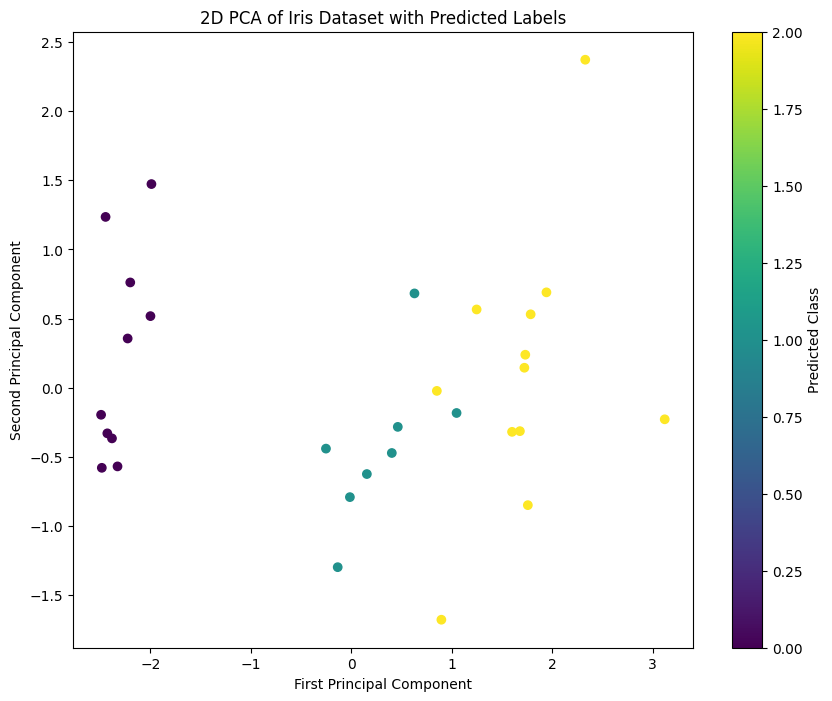

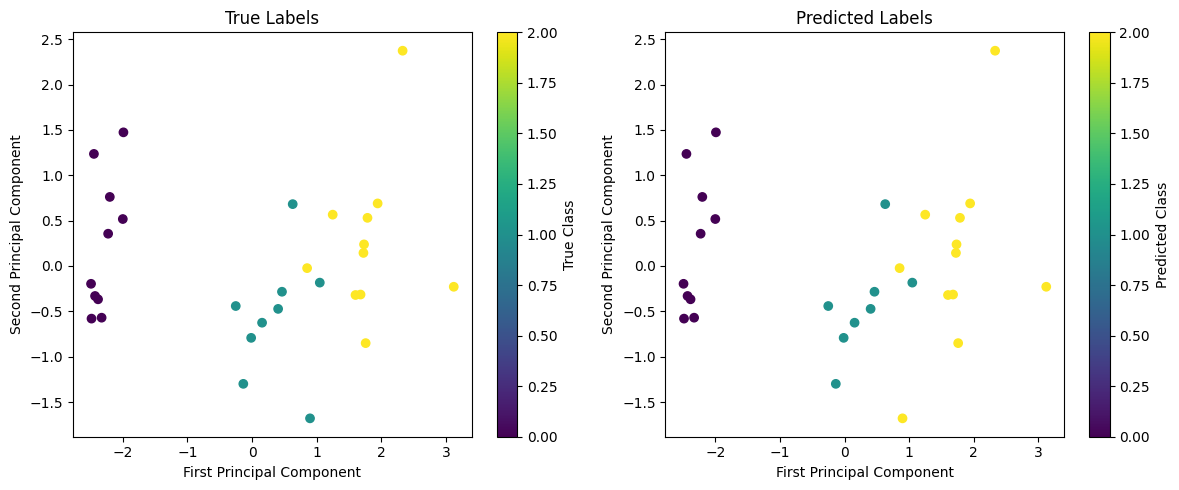

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Assume we have the model, X_test, y_test from the previous example
# If not, you'll need to load or recreate them

# Get predictions
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert to numpy for easier plotting
y_true = y_test.numpy()
y_pred = predicted.numpy()

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.show()

# 2. Classification Report
print(classification_report(y_true, y_pred, target_names=iris.target_names))

# 3. 2D Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test.numpy())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('2D PCA of Iris Dataset with Predicted Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Predicted Class')
plt.show()

# 4. Comparison of True vs Predicted Labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis')
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='True Class')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Predicted Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Predicted Class')

plt.tight_layout()
plt.show()

c:\Users\91824\Documents\Codes\deep-learning\udlbook\Notebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


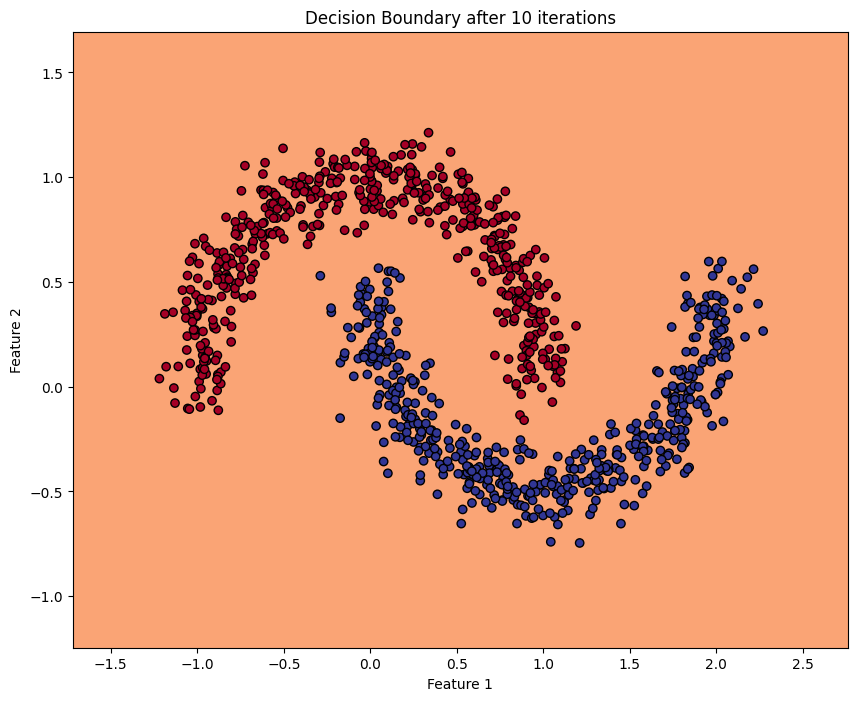

c:\Users\91824\Documents\Codes\deep-learning\udlbook\Notebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


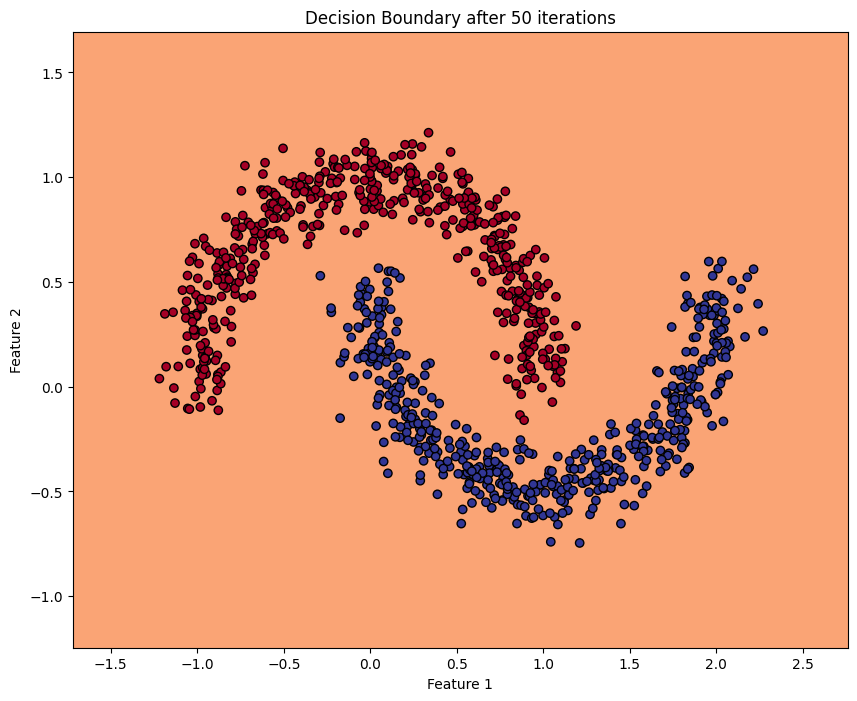

c:\Users\91824\Documents\Codes\deep-learning\udlbook\Notebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


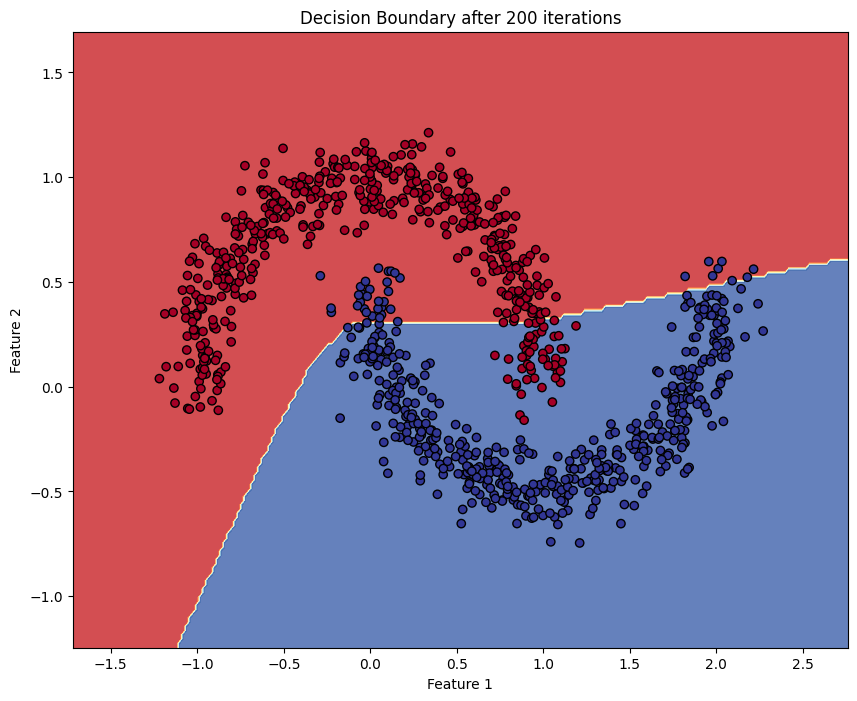

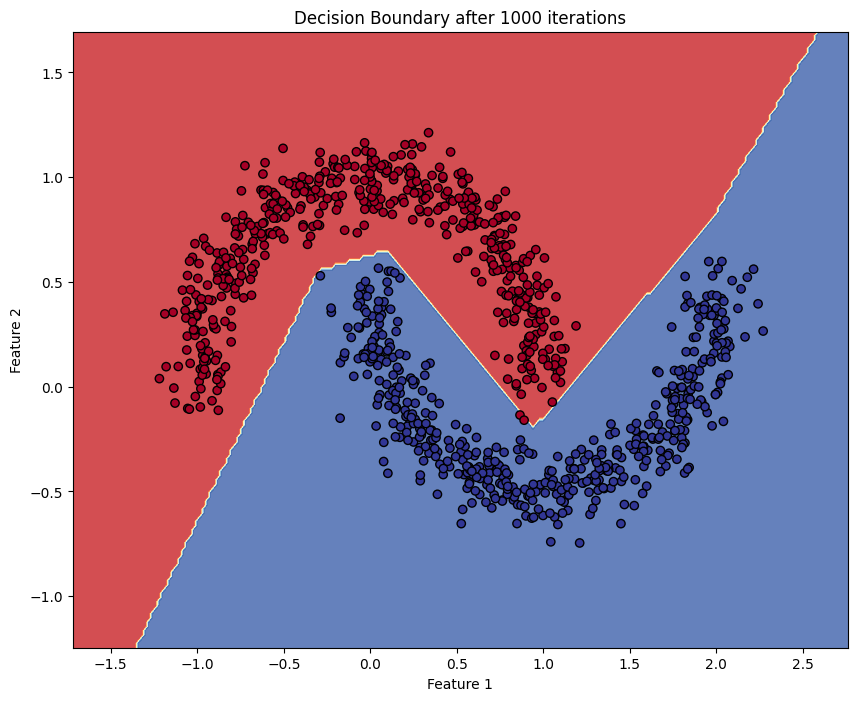

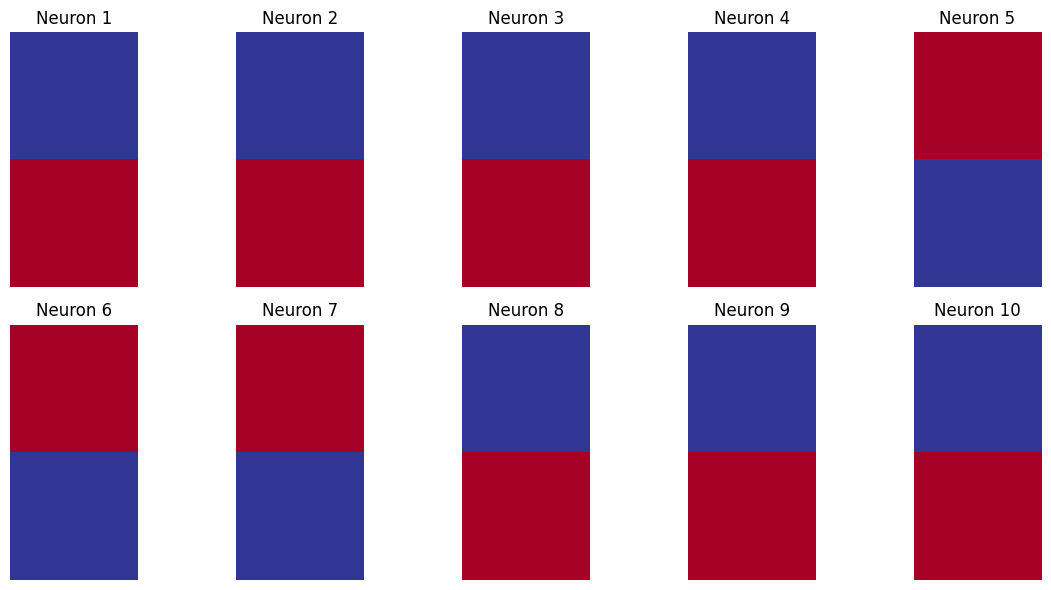

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

# Generate non-linear data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Create a simple neural network
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train the model incrementally and visualize
iterations = [10, 50, 200, 1000]
for i in iterations:
    model.set_params(max_iter=i)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, f'Decision Boundary after {i} iterations')

# Visualize the learned features in the first hidden layer
plt.figure(figsize=(12, 6))
for i, coef in enumerate(model.coefs_[0].T):
    plt.subplot(2, 5, i + 1)
    plt.imshow(coef.reshape(2, -1), cmap=plt.cm.RdYlBu)
    plt.title(f'Neuron {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

You're asking a profound question that gets to the heart of neural networks and machine learning. Let's break this down and explore the intuition behind neural networks, focusing on how they discover complex patterns and the insights of their early pioneers.

The Fundamental Intuition:

The core intuition behind neural networks comes from trying to mimic the human brain's ability to learn and recognize patterns. The key pioneers in this field, like Warren McCulloch, Walter Pitts, and Frank Rosenblatt, were inspired by how neurons in the brain work together to process information.

1. Brain Analogy:
   - Neurons in the brain receive signals, process them, and fire if the input is strong enough.
   - This inspired the artificial neuron model: inputs, weights, sum, activation function.

2. Learning from Data:
   - The brain learns by strengthening or weakening connections between neurons based on experience.
   - This inspired the idea of adjustable weights in neural networks.

3. Complex Pattern Recognition:
   - The brain can recognize complex patterns by combining simpler patterns.
   - This led to the idea of layered networks, where each layer can learn increasingly complex features.

How Neural Networks Discover Complex Patterns:

1. Hierarchical Feature Learning:
   - Lower layers learn simple features (e.g., edges in images).
   - Higher layers combine these to learn more complex features (e.g., shapes, objects).

2. Non-linear Transformations:
   - Activation functions introduce non-linearity, allowing the network to learn complex, non-linear relationships in data.

3. High-dimensional Representations:
   - NNs transform data into high-dimensional spaces where patterns might become more separable.

4. Gradient-based Learning:
   - Backpropagation allows the network to adjust its internal parameters to minimize error, effectively "discovering" useful patterns.

To illustrate this intuition, let's create a simple visualization of how a neural network might learn to recognize patterns in data:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

# Generate non-linear data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Create a simple neural network
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train the model incrementally and visualize
iterations = [10, 50, 200, 1000]
for i in iterations:
    model.set_params(max_iter=i)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, f'Decision Boundary after {i} iterations')

# Visualize the learned features in the first hidden layer
plt.figure(figsize=(12, 6))
for i, coef in enumerate(model.coefs_[0].T):
    plt.subplot(2, 5, i + 1)
    plt.imshow(coef.reshape(2, -1), cmap=plt.cm.RdYlBu)
    plt.title(f'Neuron {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

```

This visualization demonstrates several key intuitions:

1. Non-linear Pattern Discovery:
   - The network learns to separate the two classes in a non-linear dataset (the "moons" shape).
   - As training progresses, you see the decision boundary becoming more refined and accurately capturing the shape of the data.

2. Feature Learning:
   - The visualization of the first hidden layer weights shows what patterns each neuron has learned to detect.
   - Some neurons might respond to specific directions or curves in the input space.

3. Incremental Learning:
   - The network doesn't immediately find the perfect solution. It gradually refines its understanding of the data patterns.

4. Adaptation to Data Structure:
   - Without being explicitly programmed to look for moon shapes, the network adapts its internal representations to capture this structure.

The Intuition of Early Pioneers:

1. Warren McCulloch and Walter Pitts (1943):
   - Intuition: Logical operations could be performed by networks of simple neuron-like elements.
   - This laid the groundwork for viewing neural computation as a powerful, general-purpose method.

2. Frank Rosenblatt (Perceptron, 1958):
   - Intuition: A simple neural model could learn to classify patterns if provided with examples.
   - This introduced the powerful idea of a learning algorithm that could adjust its own parameters.

3. David Rumelhart, Geoffrey Hinton, and Ronald Williams (Backpropagation, 1986):
   - Intuition: Complex, multi-layer networks could be trained efficiently by propagating error gradients backward through the network.
   - This breakthrough allowed for training deep networks capable of learning complex patterns.

Key Intuitions for Understanding Neural Networks:

1. Universal Function Approximation: Neural networks can approximate any continuous function, given enough neurons. This means they can, in theory, learn any pattern in the data.

2. Distributed Representations: Information is represented across many neurons, allowing for rich, nuanced encodings of patterns.

3. Gradient Descent as Optimization: The learning process can be viewed as finding the minimum of a complex error landscape.

4. Feature Hierarchy: Deep networks learn a hierarchy of features, from simple to complex, mirroring how we believe perception works in biological systems.

Developing Your Own Intuition:

1. Experiment with Simple Cases: Start with toy problems and visualize how the network learns.
2. Study Activation Patterns: Look at how different inputs activate neurons differently.
3. Analyze Learned Weights: Visualize what patterns individual neurons or layers have learned to detect.
4. Compare to Other Methods: Understand where neural networks excel compared to other ML techniques.
5. Connect to Mathematical Principles: Understand the underlying linear algebra and calculus driving the learning process.

Remember, the power of neural networks often lies in their ability to discover useful representations of data without being explicitly programmed to do so. This emergence of complex pattern recognition from simple, repeated operations is at the heart of why neural networks are so powerful and why they continue to surprise us with their capabilities.

Epoch [100/1000], Loss: 0.1001
Epoch [200/1000], Loss: 0.0554
Epoch [300/1000], Loss: 0.0495
Epoch [400/1000], Loss: 0.0478
Epoch [500/1000], Loss: 0.0472
Epoch [600/1000], Loss: 0.0469
Epoch [700/1000], Loss: 0.0468
Epoch [800/1000], Loss: 0.0467
Epoch [900/1000], Loss: 0.0467
Epoch [1000/1000], Loss: 0.0467


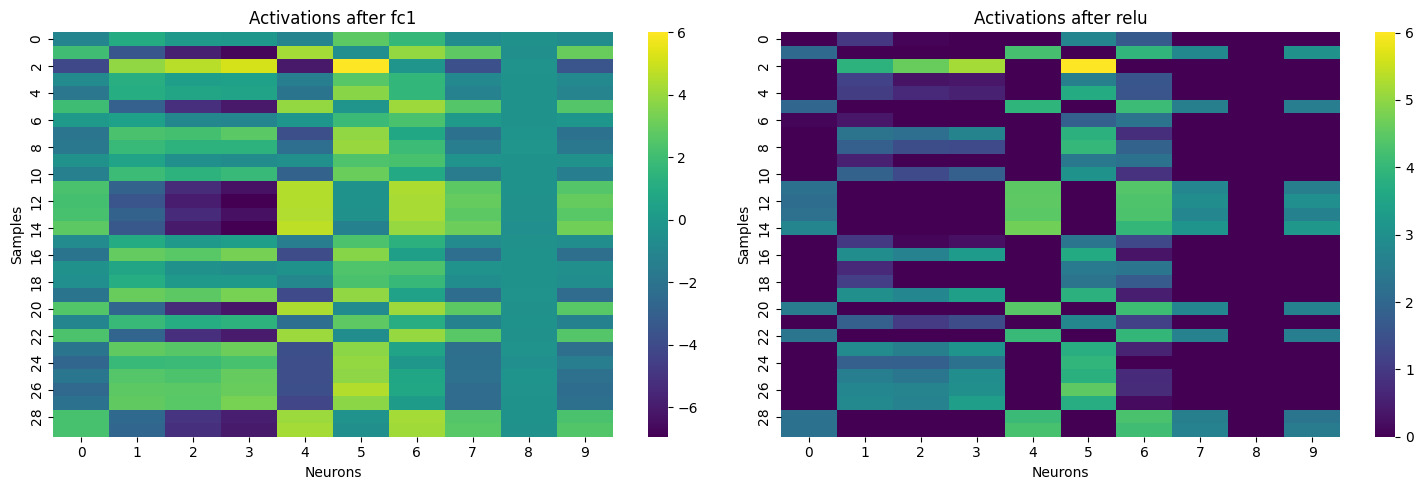

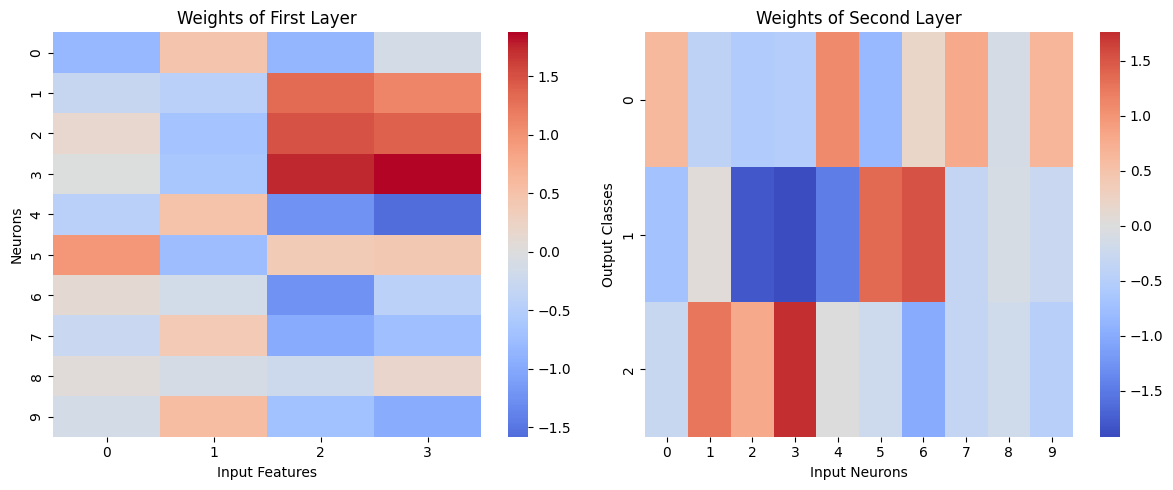

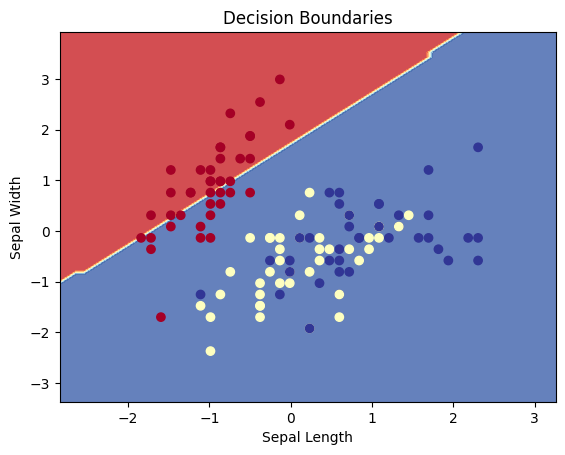

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Define the neural network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = IrisNet()

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Function to get activations
def get_activations(model, input_data):
    activations = {}
    def hook(name):
        def fun(_, __, output):
            activations[name] = output.detach()
        return fun

    model.fc1.register_forward_hook(hook('fc1'))
    model.relu.register_forward_hook(hook('relu'))
    
    with torch.no_grad():
        model(input_data)
    
    return activations

# Visualize activations
activations = get_activations(model, X_test)

plt.figure(figsize=(15, 5))
for i, (name, activation) in enumerate(activations.items()):
    plt.subplot(1, 2, i+1)
    sns.heatmap(activation.numpy(), cmap='viridis')
    plt.title(f'Activations after {name}')
    plt.xlabel('Neurons')
    plt.ylabel('Samples')
plt.tight_layout()
plt.show()

# Visualize weights
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(model.fc1.weight.detach().numpy(), cmap='coolwarm', center=0)
plt.title('Weights of First Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons')

plt.subplot(1, 2, 2)
sns.heatmap(model.fc2.weight.detach().numpy(), cmap='coolwarm', center=0)
plt.title('Weights of Second Layer')
plt.xlabel('Input Neurons')
plt.ylabel('Output Classes')

plt.tight_layout()
plt.show()

# Visualize decision boundaries (for 2 features)
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel(), 
                                      np.zeros_like(xx.ravel()), 
                                      np.zeros_like(xx.ravel())]))
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Decision Boundaries')
    plt.show()

# Plot decision boundaries for the first two features
plot_decision_boundary(model, X_train[:, :2], y_train)